In [84]:
import pandas as pd

In [85]:
df = pd.read_csv('soldier.csv')
df.head()

,Unnamed: 0,extremes,gsteukgiCd,gsteukgiNm,gunGbnm,iybudaeCdm,iyyjjongryoYm,iyyjsijakYm,jeopsuJrdtm,jeopsuPcnt,jeopsuSjdtm,mojipGbnm,mojipTms,mojipYy,rate,rnum,seonbalPcnt
0,0,29,43,기관,해군,해군교육사령부,202405,202405,20240227,59,20240220,일반기술/전문기술병,102,2024,2.0,1,30
1,1,501,11,일반,해군,해군교육사령부,202405,202405,20240227,601,20240220,일반기술/전문기술병,102,2024,6.0,2,100
2,2,32,11.05,조리,해군,해군교육사령부,202405,202405,20240227,62,20240220,일반기술/전문기술병,102,2024,2.1,3,30
3,3,52,803,동반_군사경찰,해군,해군교육사령부,202405,202405,20240227,62,20240220,동반입대병,102,2024,6.2,4,10
4,4,28,B11,(2함대)일반,해군,해군교육사령부,202405,202405,20240227,78,20240220,복무지역선택병,102,2024,1.6,5,50


In [86]:
df['iyyjsijakYm'] = pd.to_datetime(df['iyyjsijakYm'], format=('%Y%m'))
df['month'] = df['iyyjsijakYm'].dt.month
apt_df = df[(df['gunGbnm'] == '육군') & (df['month'].isin([5,6]))]

In [87]:
apt_df.shape

(226, 18)

In [88]:
may_df = apt_df[apt_df['month'] == 5]
june_df = apt_df[apt_df['month'] == 6]

In [90]:
print('5월 육군 평균 과부족 인원 : ', may_df.groupby('gunGbnm')['extremes'].sum().iloc[0])
print('6월 육군 평균 과부족 인원 : ', june_df.groupby('gunGbnm')['extremes'].sum().iloc[0])

5월 육군 평균 과부족 인원 :  15181
6월 육군 평균 과부족 인원 :  8263


In [ ]:
print('5월 육군 평균 과부족 인원 : ', may_df['extremes'])
print('6월 육군 평균 과부족 인원 : ', june_df['extremes'])

In [92]:
from pingouin import ttest
ttest(may_df['extremes'], june_df['extremes'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.276349,216.579725,two-sided,0.203199,"[-21.57, 100.84]",0.163887,0.314,0.230297


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

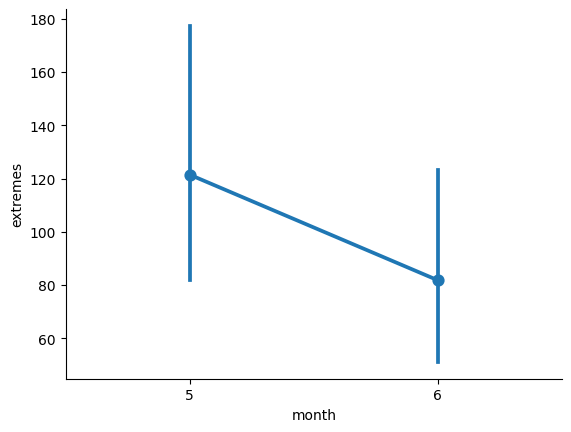

In [97]:
fig,ax = plt.subplots()
sns.pointplot(x='month', y='extremes', data=apt_df)
sns.despine()
plt.show()